In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install mlflow
import mlflow
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_7.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_210.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_471.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_343.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_250.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_716.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_271.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_549.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_35.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_641.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_519.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_34.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_36.jpg
/kaggle/input/realwaste-dataset/splited dataset/val/Metal/Metal_773.j

In [2]:
df_train = '/kaggle/input/realwaste-dataset/splited dataset/train'
df_val = '/kaggle/input/realwaste-dataset/splited dataset/val'
df_test = '/kaggle/input/realwaste-dataset/splited dataset/test'

In [3]:
mlflow.set_tracking_uri("file://" + os.getcwd() + "/mlruns")

In [4]:
from sklearn.utils.class_weight import compute_class_weight

# Check class distribution to avoid imbalance issues
labels = os.listdir(df_train)
class_counts = {label: len(os.listdir(os.path.join(df_train, label))) for label in labels}
print("Class distribution:", class_counts)

# Compute class weights
class_weight = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(list(class_counts.keys())),
    y=np.concatenate([[label] * count for label, count in class_counts.items()])
)
class_weight = dict(enumerate(class_weight))
print("Computed class weights:", class_weight)

Class distribution: {'Metal': 474, 'Glass': 252, 'Paper': 300, 'Vegetation': 261, 'Cardboard': 276, 'Textile Trash': 190, 'Food Organics': 246, 'Plastic': 552, 'Miscellaneous Trash': 297}
Computed class weights: {0: 1.146537842190016, 1: 1.2863595302619693, 2: 1.255731922398589, 3: 0.6676043131739334, 4: 1.0654695099139544, 5: 1.0548148148148149, 6: 0.573268921095008, 7: 1.6654970760233918, 8: 1.2124308216262238}


In [5]:
import glob as gb
import matplotlib as plt
import matplotlib.image as mpimg

size = []

for label in os.listdir(df_train):
    images_paths = gb.glob(str(df_train +'/'+label+'/*.jpg'))

    for img_path in images_paths:
        img = mpimg.imread(img_path)
        img_shape = img.shape
        size.append(img_shape)

In [6]:
df = pd.DataFrame(size)
df.value_counts()

0    1    2
524  524  3    2848
Name: count, dtype: int64

In [7]:
size = []

for label in os.listdir(df_val):
    images_paths = gb.glob(str(df_val +'/'+label+'/*.jpg'))

    for img_path in images_paths:
        img = mpimg.imread(img_path)
        img_shape = img.shape
        size.append(img_shape)

In [8]:
df_va = pd.DataFrame(size)
df_va.value_counts()

0    1    2
524  524  3    949
Name: count, dtype: int64

In [9]:
size = []

for label in os.listdir(df_test):
    images_paths = gb.glob(str(df_test +'/'+label+'/*.jpg'))

    for img_path in images_paths:
        img = mpimg.imread(img_path)
        img_shape = img.shape
        size.append(img_shape)

In [10]:
df_tes = pd.DataFrame(size)
df_tes.value_counts()

0    1    2
524  524  3    955
Name: count, dtype: int64

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageGenerators for training 
train_datagen = ImageDataGenerator(
    rotation_range = 15, 
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range=[0.7, 1.3],  # New
    vertical_flip=True,  # New
    rescale = 1/255
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/realwaste-dataset/splited dataset/train',
    target_size=(256, 256),  #  Fix: Resizing
    batch_size = 32,
    class_mode = 'categorical'
)

2025-04-14 15:22:53.861128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744644174.174695      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744644174.265109      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2848 images belonging to 9 classes.


In [12]:
train_batch = train_generator

In [13]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/realwaste-dataset/splited dataset/val',
    target_size=(256, 256),  #  Fix: Resizing
    batch_size = 32,
    class_mode = 'categorical'
)

Found 949 images belonging to 9 classes.


In [14]:
val_batch = val_generator

In [15]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/realwaste-dataset/splited dataset/test',
    target_size=(256, 256),  #  Fix: Resizing
    batch_size = 32,
    class_mode = 'categorical'
)

Found 955 images belonging to 9 classes.


In [16]:
test_batch= test_generator

In [17]:
train_batch[0]

(array([[[[0.7490196 , 0.7490196 , 0.7490196 ],
          [0.654902  , 0.654902  , 0.654902  ],
          [0.40784317, 0.4039216 , 0.40000004],
          ...,
          [0.28235295, 0.2784314 , 0.27058825],
          [0.77647066, 0.7725491 , 0.76470596],
          [0.73333335, 0.72156864, 0.70980394]],
 
         [[0.7490196 , 0.7490196 , 0.7490196 ],
          [0.65882355, 0.65882355, 0.65882355],
          [0.41176474, 0.40784317, 0.40000004],
          ...,
          [0.2901961 , 0.28627452, 0.2784314 ],
          [0.76470596, 0.76470596, 0.7568628 ],
          [0.73333335, 0.7254902 , 0.7137255 ]],
 
         [[0.75294125, 0.75294125, 0.75294125],
          [0.6666667 , 0.6666667 , 0.6627451 ],
          [0.4156863 , 0.41176474, 0.4039216 ],
          ...,
          [0.29803923, 0.29411766, 0.2901961 ],
          [0.7568628 , 0.75294125, 0.74509805],
          [0.7372549 , 0.7294118 , 0.7176471 ]],
 
         ...,
 
         [[0.70980394, 0.70980394, 0.70980394],
          [0.60392

In [18]:
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("learning_rate", 0.00001)
    mlflow.log_param("epochs", 20)
    mlflow.log_param("batch_size", 64)


In [19]:
from tensorflow.keras.applications import VGG19, VGG16

# 1. Load pre-trained VGG19 model (excluding top classification layer)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

I0000 00:00:1744644190.496045      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744644190.496763      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
# import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_true = K.cast(y_true, K.floatx())
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
        loss = -y_true * alpha * K.pow(1 - y_pred, gamma) * K.log(y_pred)
        return K.sum(loss, axis=1)
    return loss

In [21]:
print(len(base_model.layers))   # for reference
base_model.trainable = False
# Unfreeze last 5 layers
for layer in base_model.layers[-5 : ] :
    layer.trainable = True

22


In [22]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# 2. Add custom top layers for  classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
Dropout(0.5)(x)
output_layer = Dense(9, activation='softmax')(x)

In [23]:
from tensorflow.keras.models import Model

# 3. add all layer togeather
model = Model(inputs=base_model.input, outputs=output_layer)

In [24]:
from tensorflow.keras.optimizers import Adam

# 4. Compile the model
model.compile(optimizer=Adam(learning_rate = 0.00001), loss = focal_loss(), metrics = ['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                             patience=2, min_lr=1e-7)
# Add to callbacks
callbacks = [early_stop, reduce_lr]

In [26]:
# 5. Train the model
batch_size = 64
epochs = 18
history = model.fit(train_generator, epochs = epochs, validation_data = val_batch,
                    class_weight = class_weight,  # Fix: Handling class imbalance
                    batch_size = batch_size)
, callbacks = [callbacks]

Epoch 1/18


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744644203.101957     101 service.cc:148] XLA service 0x7892b8005040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744644203.103096     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744644203.103140     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744644203.731902     101 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-14 15:23:30.926277: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=0} for conv (f32[32,128,128,1

89/89 ━━━━━━━━━━━━━━━━━━━━ 102s 861ms/step - accuracy: 0.1853 - loss: 0.4084 - val_accuracy: 0.4784 - val_loss: 0.2701
Epoch 2/18
89/89 ━━━━━━━━━━━━━━━━━━━━ 71s 739ms/step - accuracy: 0.4724 - loss: 0.2449 - val_accuracy: 0.5553 - val_loss: 0.1932
Epoch 3/18
89/89 ━━━━━━━━━━━━━━━━━━━━ 71s 744ms/step - accuracy: 0.5739 - loss: 0.1842 - val_accuracy: 0.6048 - val_loss: 0.1624
Epoch 4/18
89/89 ━━━━━━━━━━━━━━━━━━━━ 71s 742ms/step - accuracy: 0.6149 - loss: 0.1551 - val_accuracy: 0.6617 - val_loss: 0.1375
Epoch 5/18
89/89 ━━━━━━━━━━━━━━━━━━━━ 72s 755ms/step - accuracy: 0.6294 - loss: 0.1439 - val_accuracy: 0.6628 - val_loss: 0.1328
Epoch 6/18
89/89 ━━━━━━━━━━━━━━━━━━━━ 72s 758ms/step - accuracy: 0.6713 - loss: 0.1298 - val_accuracy: 0.6733 - val_loss: 0.1178
Epoch 7/18
89/89 ━━━━━━━━━━━━━━━━━━━━ 71s 746ms/step - accuracy: 0.6947 - loss: 0.1157 - val_accuracy: 0.6670 - val_loss: 0.1185
Epoch 8/18
89/89 ━━━━━━━━━━━━━━━━━━━━ 71s 746ms/step - accuracy: 0.7125 - loss: 0.1058 - val_accuracy: 0.66

('callbacks', '=', '[callbacks]')

In [27]:
model.save('/kaggle/working/model_keras.h5')

In [28]:
val_acc = history.history["val_accuracy"][-1]
val_loss = history.history["val_loss"][-1]

mlflow.log_metric("val_accuracy", val_acc)
mlflow.log_metric("val_loss", val_loss)

# Log the model
mlflow.keras.log_model(model, "model")


2025/04/14 15:45:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/14 15:45:28 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpz5y4y3_r/model, flavor: keras). Fall back to return ['keras==3.5.0']. Set logging level to DEBUG to see the full traceback. 
2025/04/14 15:45:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [29]:
# Evaluate on train data
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
print(f"\nTrain Accuracy: {train_acc:.4f}")

# Evaluate on validation data
val_loss, val_acc = model.evaluate(val_generator, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")



Train Accuracy: 0.8220
Validation Accuracy: 0.7703


In [30]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on validation set
val_generator.reset()
y_pred_probs = model.predict(val_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Print classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_true, y_pred, target_names=class_labels))


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step

Classification Report (Validation Set):
                     precision    recall  f1-score   support

          Cardboard       0.14      0.09      0.11        92
      Food Organics       0.05      0.04      0.04        82
              Glass       0.16      0.20      0.18        84
              Metal       0.15      0.15      0.15       158
Miscellaneous Trash       0.16      0.12      0.14        99
              Paper       0.11      0.14      0.12       100
            Plastic       0.14      0.14      0.14       184
      Textile Trash       0.05      0.06      0.06        63
         Vegetation       0.12      0.14      0.13        87

           accuracy                           0.12       949
          macro avg       0.12      0.12      0.12       949
       weighted avg       0.13      0.12      0.12       949



Test Set Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


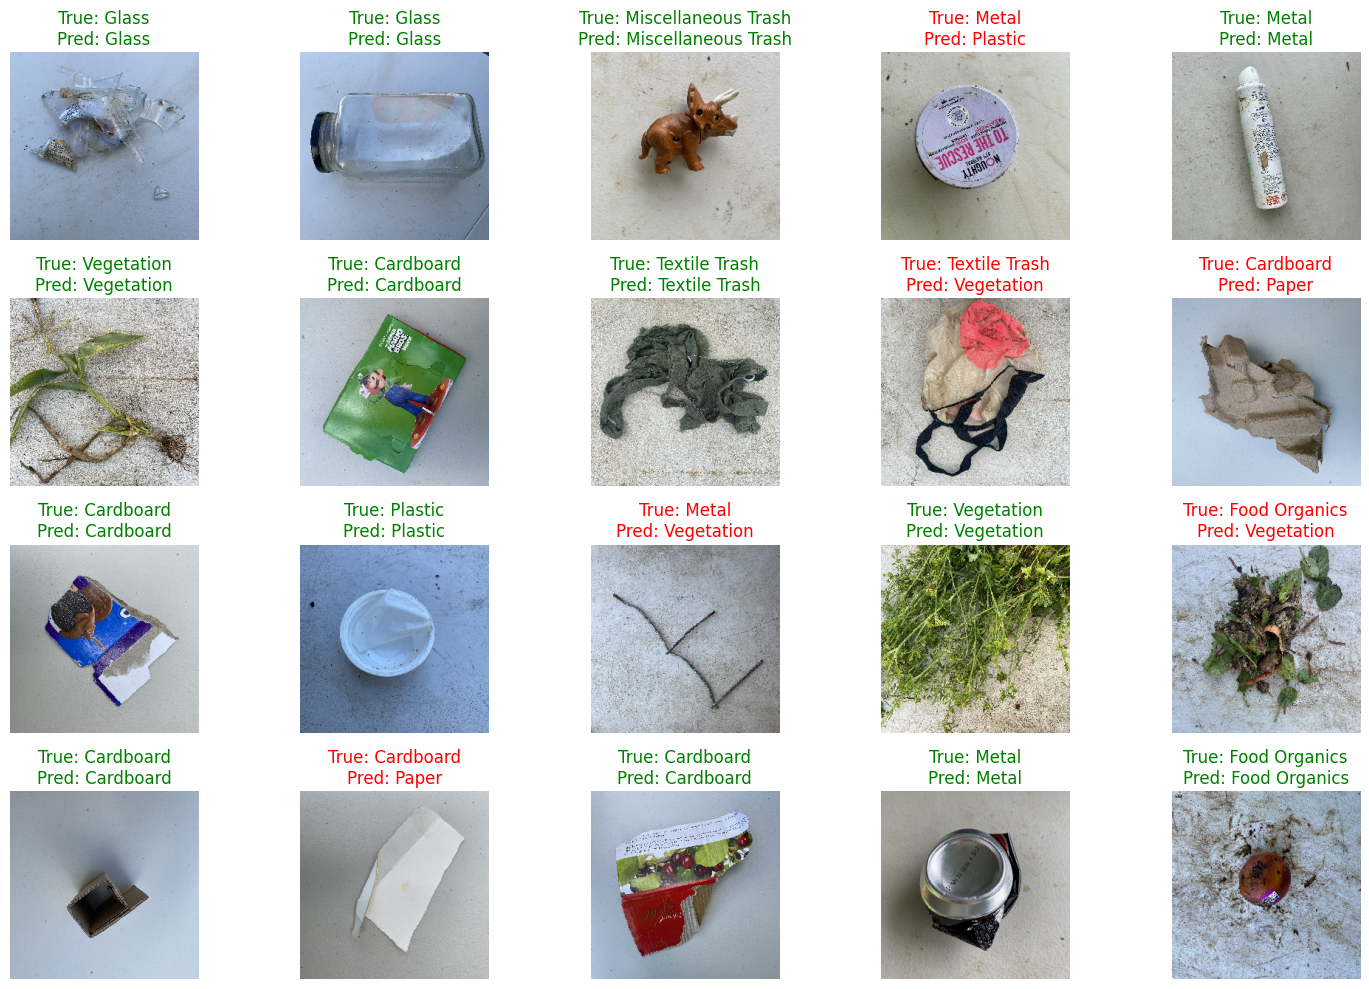

In [31]:
import matplotlib.pyplot as plt

def plot_test_predictions(model, test_generator, num_images=20):
    class_names = list(test_generator.class_indices.keys())
    images, labels = next(test_generator)
    
    plt.figure(figsize=(15, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(4, 5, i+1)
        plt.imshow(images[i])
        
        # Get prediction
        pred = model.predict(np.expand_dims(images[i], axis=0))
        pred_class = class_names[np.argmax(pred)]
        true_class = class_names[np.argmax(labels[i])]
        
        # Green if correct, red if wrong
        color = 'green' if pred_class == true_class else 'red'
        plt.title(f"True: {true_class}\nPred: {pred_class}", color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("Test Set Predictions:")
plot_test_predictions(model, test_generator)